<a href="https://colab.research.google.com/github/KUNALKEDARI20/Multiple-Linear-Regression/blob/main/Assignment_no_5_MLR_50_startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**◼MULTIPLE LINEAR REGRESSION**

**PROBLEM STATEMENT--Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.**

**R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [ ]:
data=pd.read_csv('/content/50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


**EDA=Exploratry Data Analysis**

In [ ]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
# to check any null values
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
data.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [ ]:
# Renaming the columns
data1=data.rename({'R&D Spend':'RDS','Administration':'ADM','Marketing Spend':'MS'},axis=1)
data1

,RDS,ADM,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


**CORRELATION ANALYSIS**

In [ ]:
data1.corr()

<ipython-input-10-73ca661ddaf0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.corr()


,RDS,ADM,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


**Scatterplot between variables**

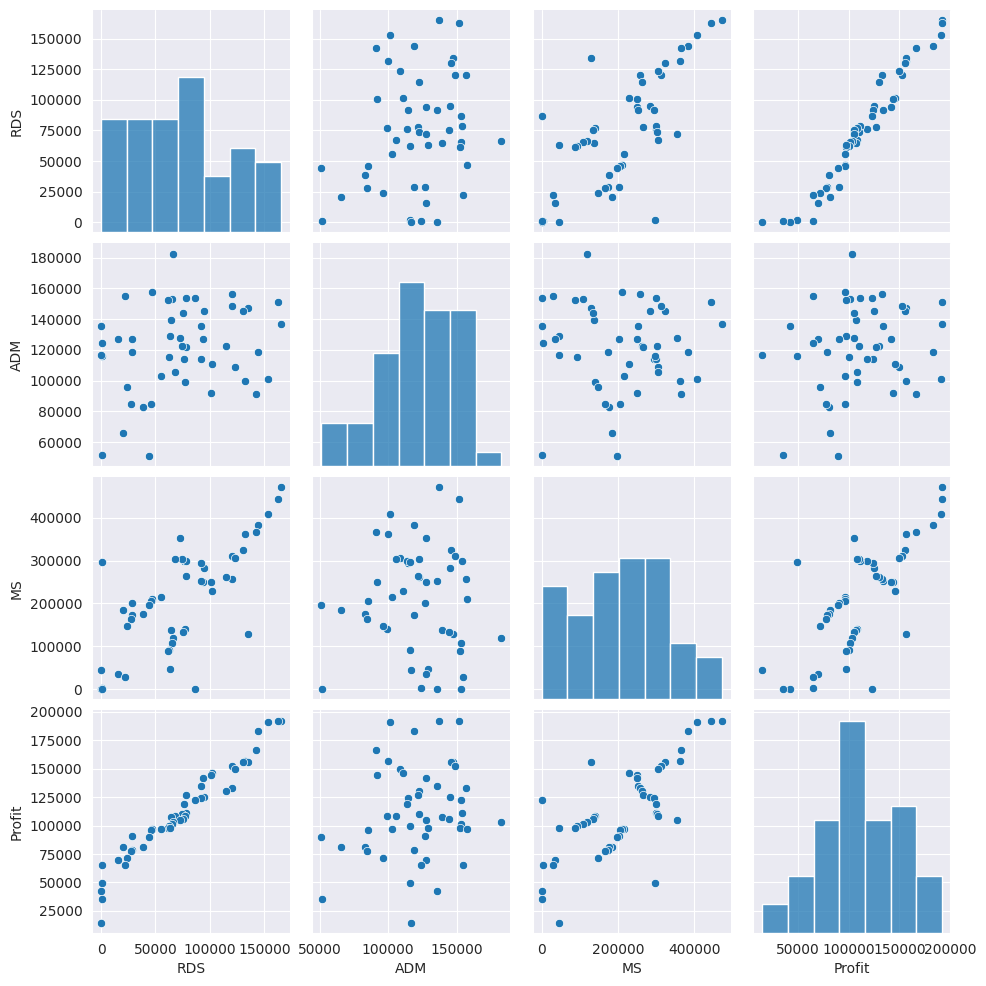

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

**MODEL BUILDING**

In [ ]:
data1.columns

Index(['RDS', 'ADM', 'MS', 'State', 'Profit'], dtype='object')

In [ ]:
# Model building
model=smf.ols('Profit~RDS+ADM+MS',data=data1).fit()

In [ ]:
# Coefficents of model
model.params


Intercept    50122.192990
RDS              0.805715
ADM             -0.026816
MS               0.027228
dtype: float64

In [ ]:
model.summary() #accuracy of model is 0.95 which is good model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           4.53e-30
Time:                        12:07:12   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print('***t-value***','\n',model.tvalues,'\n','***p-value***','\n',model.pvalues)
#P-values of ADM and MS are higher than alpha,whereas RDS p-value is approx =0 which is less than alpha. So RDS is significant for prediction of model.

***t-value*** 
 Intercept     7.626218
RDS          17.846374
ADM          -0.525507
MS            1.655077
dtype: float64 
 ***p-value*** 
 Intercept    1.057379e-09
RDS          2.634968e-22
ADM          6.017551e-01
MS           1.047168e-01
dtype: float64


In [ ]:
# Since the p-value of ADM and MS are greater than alpha ,so build simple linear regression and multi linear regression models

▶SLR=SIMPLE LINEAR REGRESSION OF ADM and MS

In [ ]:
slr_ms=smf.ols('Profit~MS',data=data1).fit()

In [ ]:
slr_ms.params

Intercept    60003.548816
MS               0.246459
dtype: float64

In [ ]:
slr_ms.tvalues,slr_ms.pvalues # p-value is approx=0 we can say that it is significant column

(Intercept    7.808356
 MS           7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64)

In [ ]:
slr_adm=smf.ols('Profit~ADM',data=data1).fit()

In [ ]:
slr_adm.params

Intercept    76974.471305
ADM              0.288749
dtype: float64

In [ ]:
slr_adm.tvalues,slr_adm.pvalues #p-value=0.162 is less than 0.5 , so ADM  has no significant p-value

(Intercept    3.040044
 ADM          1.419493
 dtype: float64,
 Intercept    0.003824
 ADM          0.162217
 dtype: float64)

▶MLR=MULTIPLE LINEAR REGRESSION OF ADM+MS

In [ ]:
mlr_adm_ms=smf.ols('Profit~ADM+MS',data=data1).fit()

In [ ]:
mlr_adm_ms.tvalues,mlr_adm_ms.pvalues # MS have p-values approx to zero while p-value of ADM is 0.017
#when we built a model together -both have significant p-values

(Intercept    1.142741
 ADM          2.467779
 MS           8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADM          1.729198e-02
 MS           9.727245e-11
 dtype: float64)

**MODEL VALIDATION TECHNIQUES**

**VIF=Variance Inflamation Factor**

for calculation of VIF the R-squared of variables should be calculated

In [ ]:
data1.columns

Index(['RDS', 'ADM', 'MS', 'State', 'Profit'], dtype='object')

In [ ]:
rsq_rds=smf.ols('RDS~ADM+MS',data=data1).fit().rsquared
vif_rds=1/(1-rsq_rds)

rsq_adm=smf.ols('ADM~RDS+MS',data=data1).fit().rsquared
vif_adm=1/(1-rsq_adm)

rsq_ms=smf.ols('MS~ADM+RDS',data=data1).fit().rsquared
vif_ms=1/(1-rsq_ms)

# Storing VIF values in dataframe
d1={'VARIABLES':['RDS','ADM','MS'],'VIF':[vif_rds,vif_adm,vif_ms]}
Vif_frame=pd.DataFrame(d1)
Vif_frame



,VARIABLES,VIF
0,RDS,2.468903
1,ADM,1.175091
2,MS,2.326773


Since No value of VIF is greater than 20 , we can say that there is no collinearity problem. So we shall consider all columns for building the model

**▶RESIDUAL ANALYSIS**

**1. Q-Q PLOT**

In [ ]:
model=smf.ols('Profit~ADM+MS+RDS',data=data1).fit()

<Figure size 9000x3000 with 0 Axes>

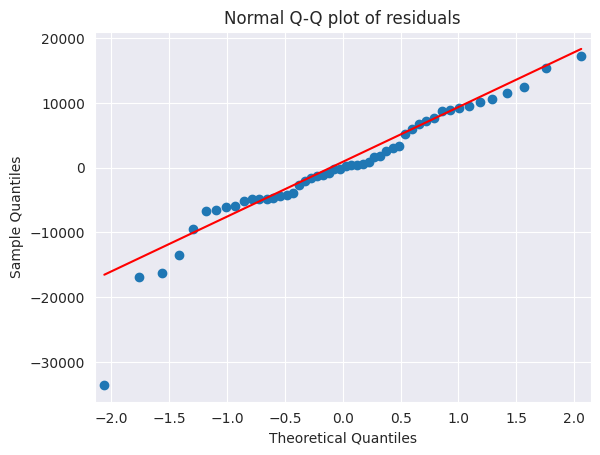

In [ ]:
import statsmodels.api as sm
plt.figure(figsize=(90,30))
sns.set_style(style='darkgrid')
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [ ]:
#to print the index of value whose residulas are less than -10000
list(np.where(model.resid<-10000))

[array([14, 15, 48, 49])]

**2.RESIDUAL PLOT FOR HOMOSCEDASTICITY:CONSTANT VARIANCE**

In [ ]:
#function definination for standardization i.e.,z score,Function name:get_standardized_values
def get_standardized_values (vals):
  return(vals-vals.mean()/vals.std()) #this is z-score (Xi-mean/std.dev)

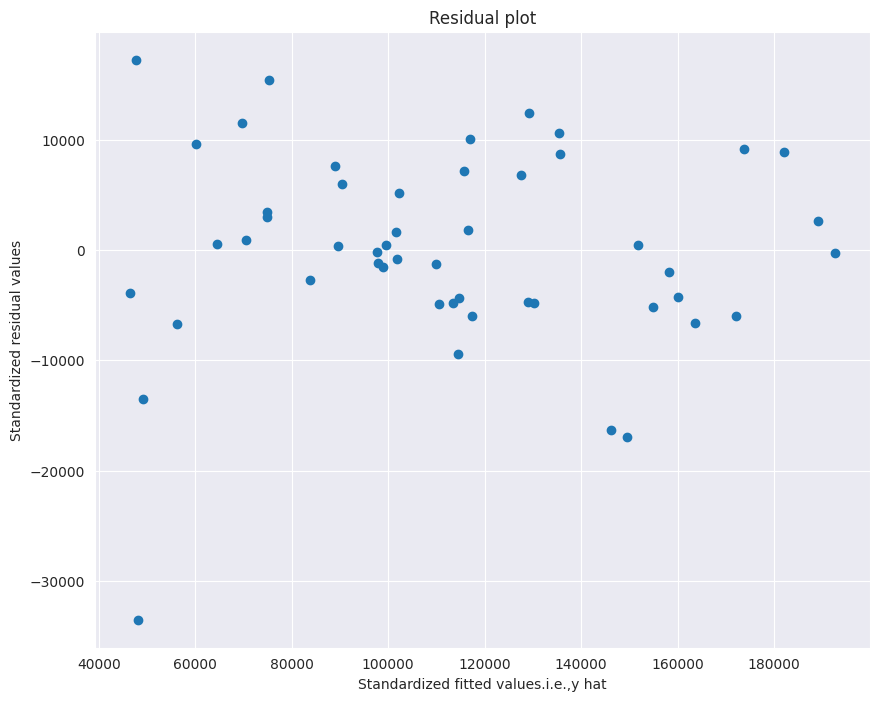

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(get_standardized_values(model.fittedvalues),#fitted values are y hat., model.resid is error
          get_standardized_values(model.resid))

plt.title('Residual plot')
plt.xlabel('Standardized fitted values.i.e.,y hat')
plt.ylabel('Standardized residual values')
plt.show()

**3.RESID0UAL VS REGRESSOR(FOR EACH VARIABLE)**

In [ ]:
data1.columns

Index(['RDS', 'ADM', 'MS', 'State', 'Profit'], dtype='object')

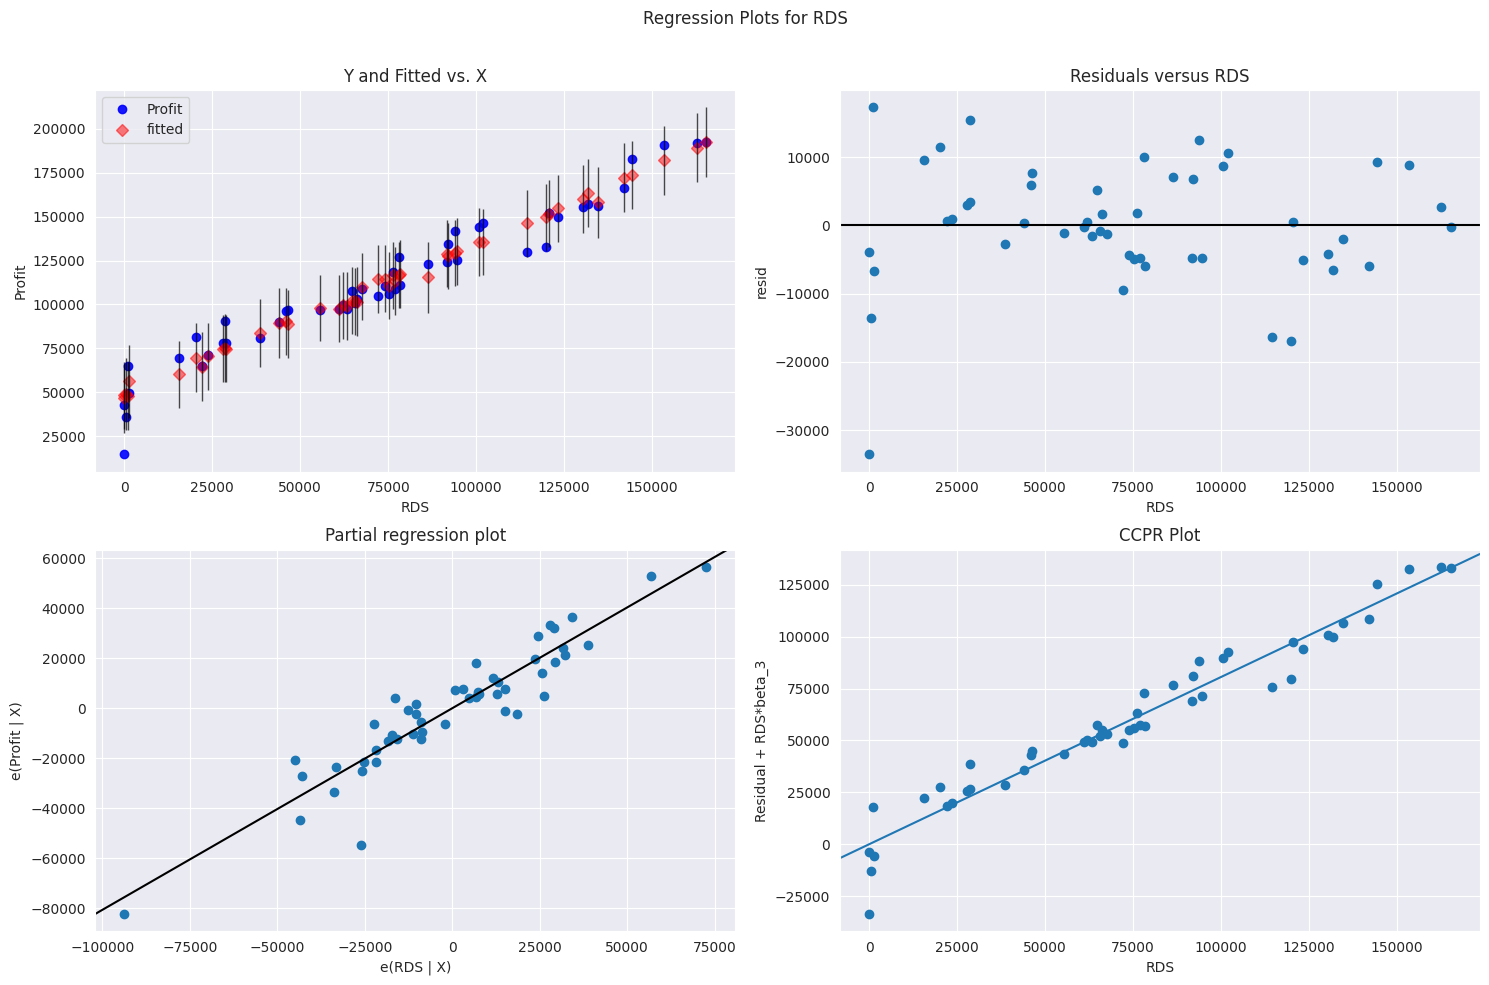

In [ ]:
#for RDS
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

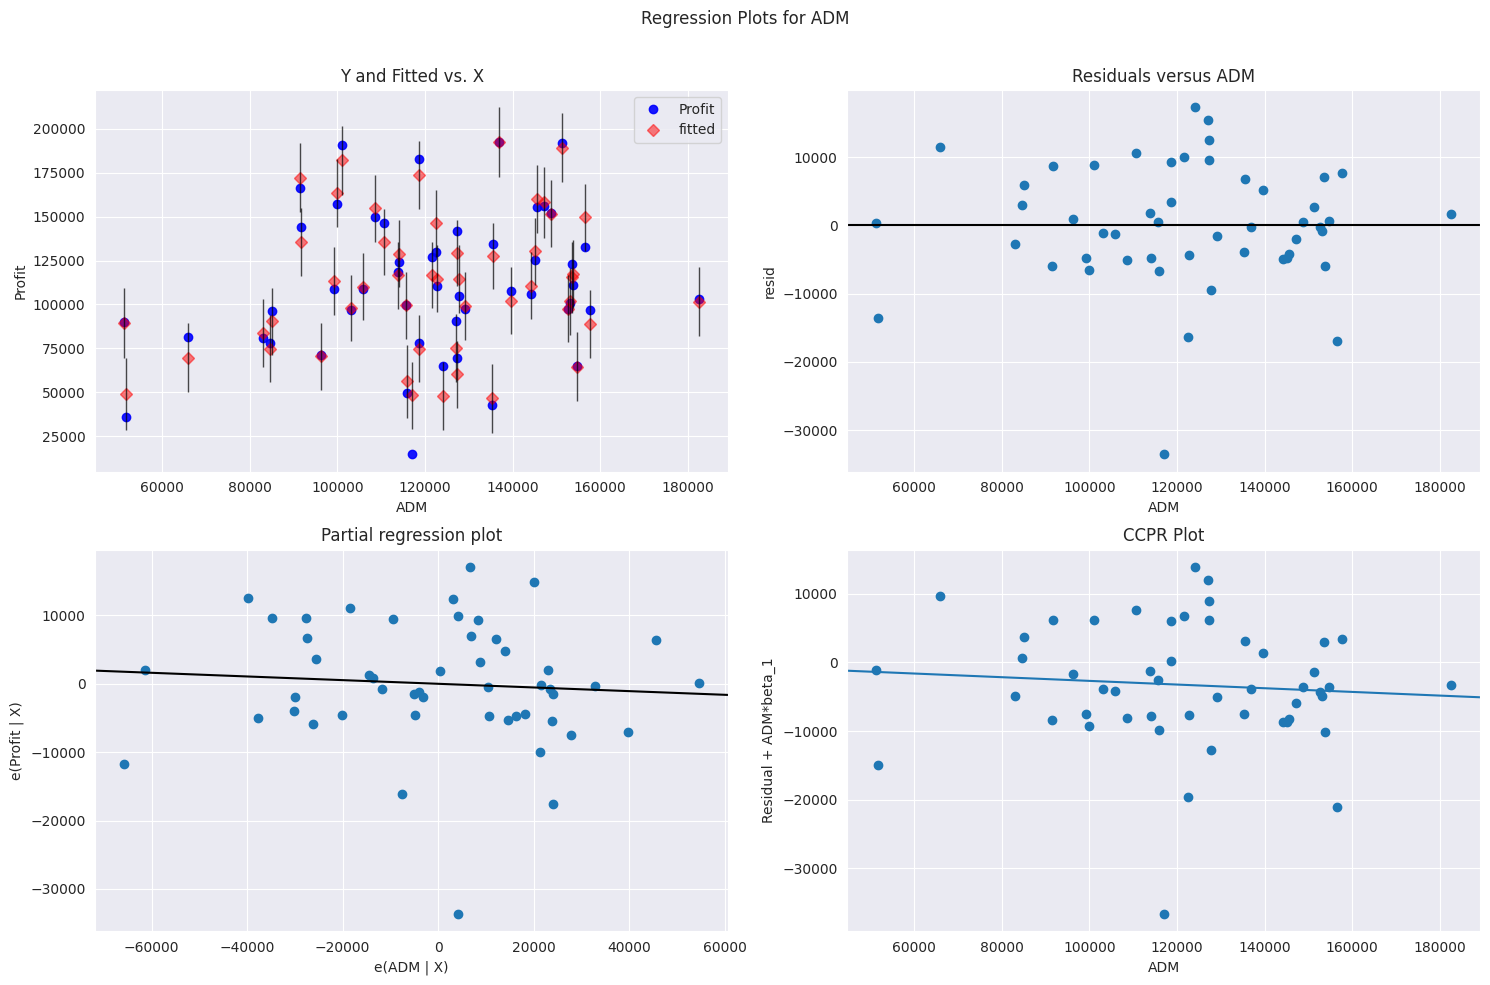

In [ ]:
#for ADM
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'ADM',fig=fig)
plt.show()

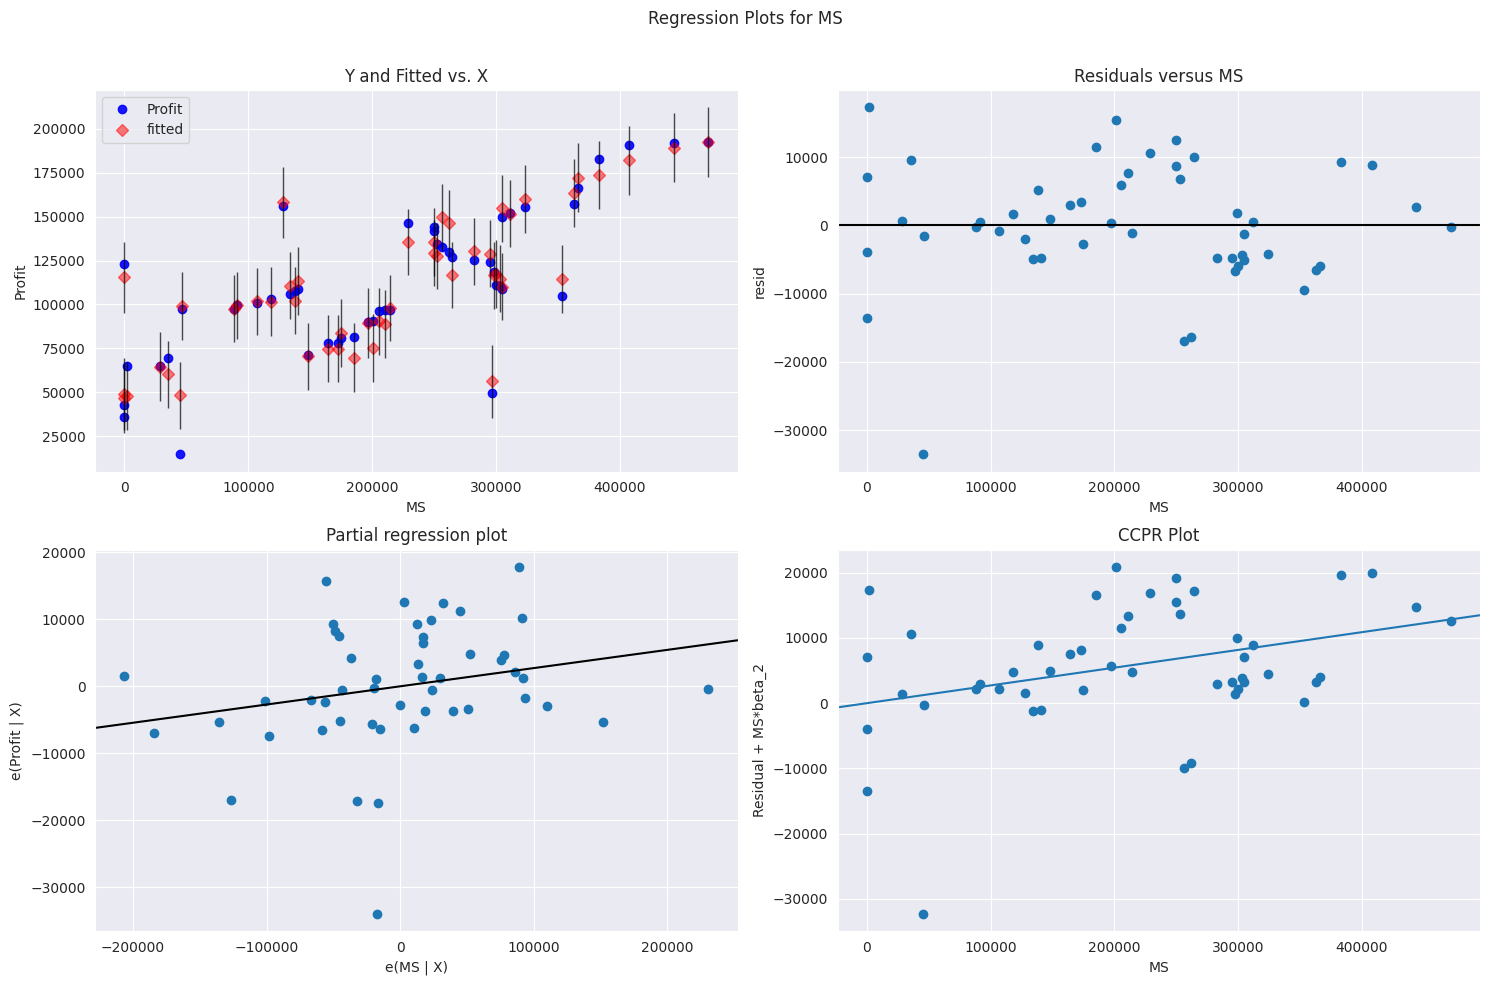

In [ ]:
#for MS
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'MS',fig=fig)
plt.show()

**MODEL DELETION DIAGNOSTICS**

**COOK'S DISTANCE**

In [ ]:
#load library
from statsmodels.graphics.regressionplots import influence_plot


In [ ]:
model_influence=model.get_influence()#this method will return 2 values: cooks distance and p value
(c,_)=model_influence.cooks_distance #we dont need p value so we placed_here .that is temporary place holder


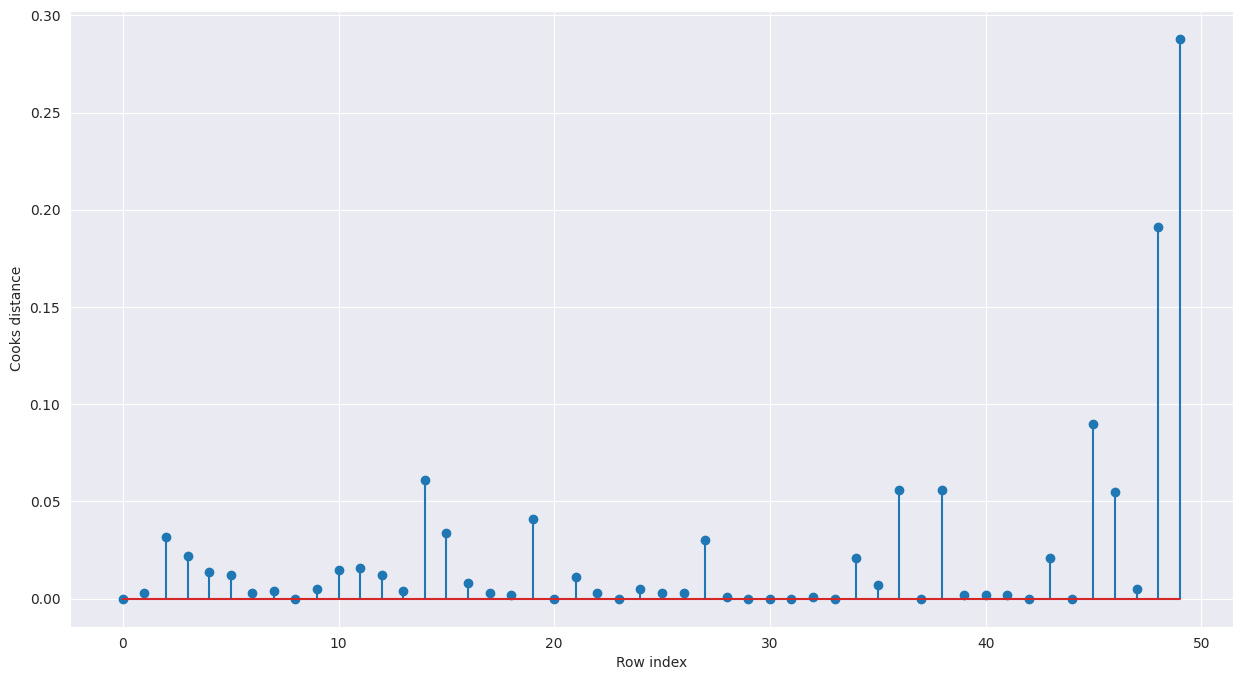

In [ ]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(15,8))
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

There are no datapoints whose value is greater than 0.5 .Therefore there no outliers/influencers

---





**HIGH INFLUENCE POINTS**

In [ ]:
data1.shape

(50, 5)

In [ ]:
data1.shape[0]

50

In [ ]:
data1.shape[1]

5

In [ ]:
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff=3*(k+1)/n
leverage_cutoff

0.36

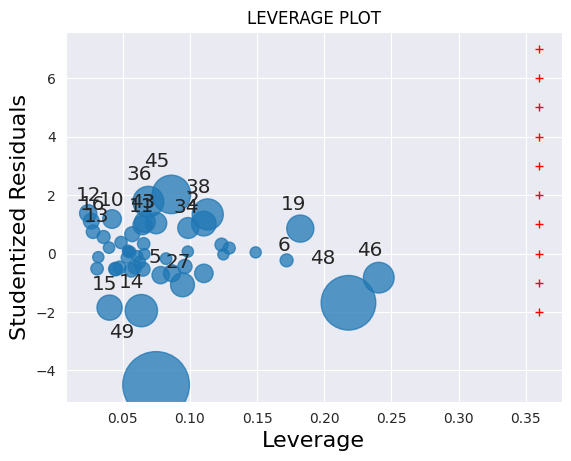

In [ ]:

influence_plot(model,alpha=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')
plt.title('LEVERAGE PLOT')
plt.show()

High influence point is 49

In [ ]:
data1[data1.index.isin([49])]

,RDS,ADM,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


**IMPROVING THE MODEL**

In [ ]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data2=data1
data2

,RDS,ADM,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
data2.shape

(50, 5)

In [ ]:
new_data=data2.drop(data2.index[[49]],axis=0).reset_index()
new_data

,index,RDS,ADM,MS,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
new_data=new_data.drop(['index'],axis=1)

In [ ]:
new_data

,RDS,ADM,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
new_data.shape #now there are 49 rows and 5 columns in new_data

(49, 5)

Building a new model

In [ ]:
model_new_data=smf.ols('Profit~RDS+MS+ADM',data=new_data).fit()

In [ ]:
model_new_data.params

Intercept    52382.439251
RDS              0.783002
MS               0.025234
ADM             -0.022201
dtype: float64

In [ ]:
print('-----------t-values----------','\n',model_new_data.tvalues,'\n','------------p-values----------','\n',model_new_data.pvalues)

-----------t-values---------- 
 Intercept     9.450782
RDS          20.469501
MS            1.825383
ADM          -0.517889
dtype: float64 
 ------------p-values---------- 
 Intercept    2.960000e-12
RDS          1.971077e-24
MS           7.458443e-02
ADM          6.070728e-01
dtype: float64


p-values are less than alpha value=0.5

In [ ]:
print('------------ACCURACY OF MODEL----------','\n',model_new_data.rsquared)#accuracy of model=96.1

------------ACCURACY OF MODEL---------- 
 0.9613162435129847


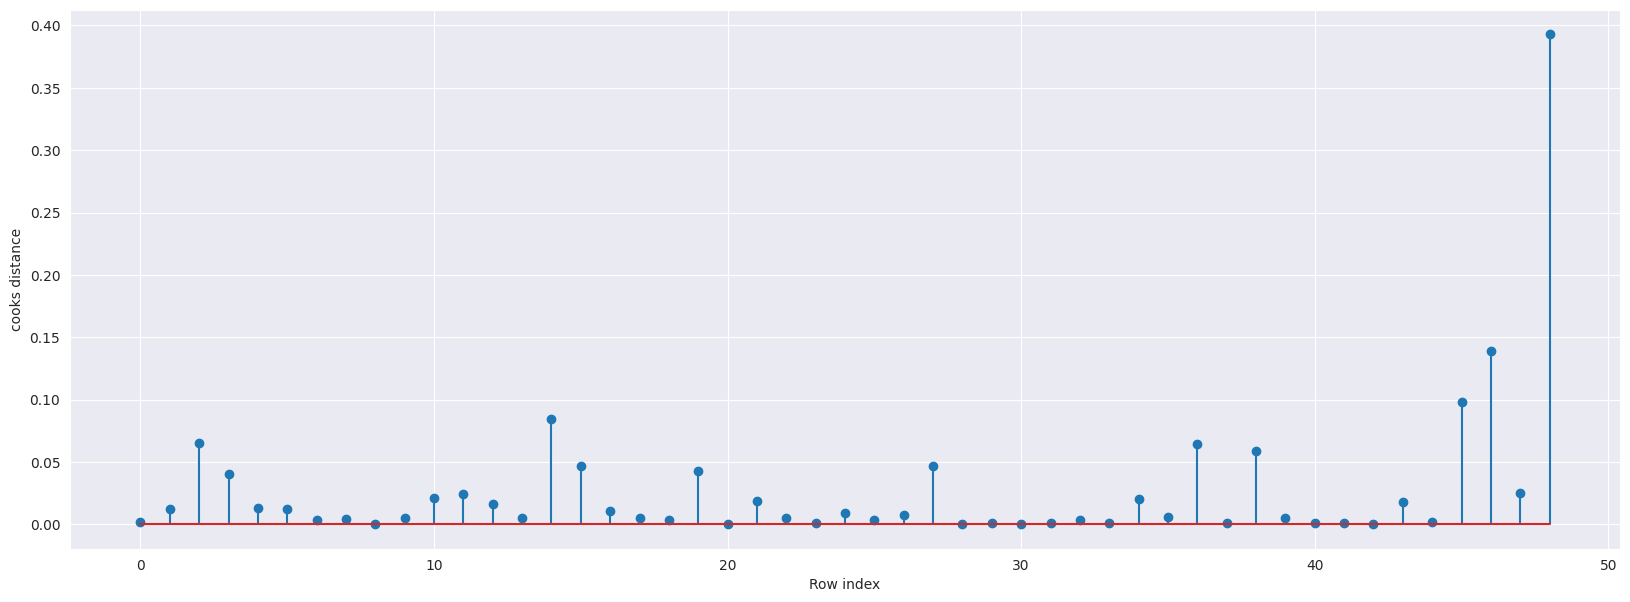

In [ ]:
#Cooks distance
new_model_influence=model_new_data.get_influence()
(c,_)=new_model_influence.cooks_distance

fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(new_data)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

Since the value is less than 1 we can stop model diagnostic



---



---

**◼ PREDICTION**

---



---



In [ ]:
pred_data=pd.DataFrame({'RDS':78000,'ADM':127864.55,"MS":249839.44},index=[1])
pred_data


,RDS,ADM,MS
1,78000,127864.55,249839.44


In [ ]:
model_new_data.predict(pred_data)

1    116922.172202
dtype: float64

In [ ]:
model_new_data.predict(new_data)

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

**Table containing r squared values**

In [ ]:
Accuracy_models=pd.DataFrame({'Prepared Models':['model','model_new_data'],'R-squared values':[model.rsquared,model_new_data.rsquared]})
Accuracy_models

,Prepared Models,R-squared values
0,model,0.950746
1,model_new_data,0.961316
